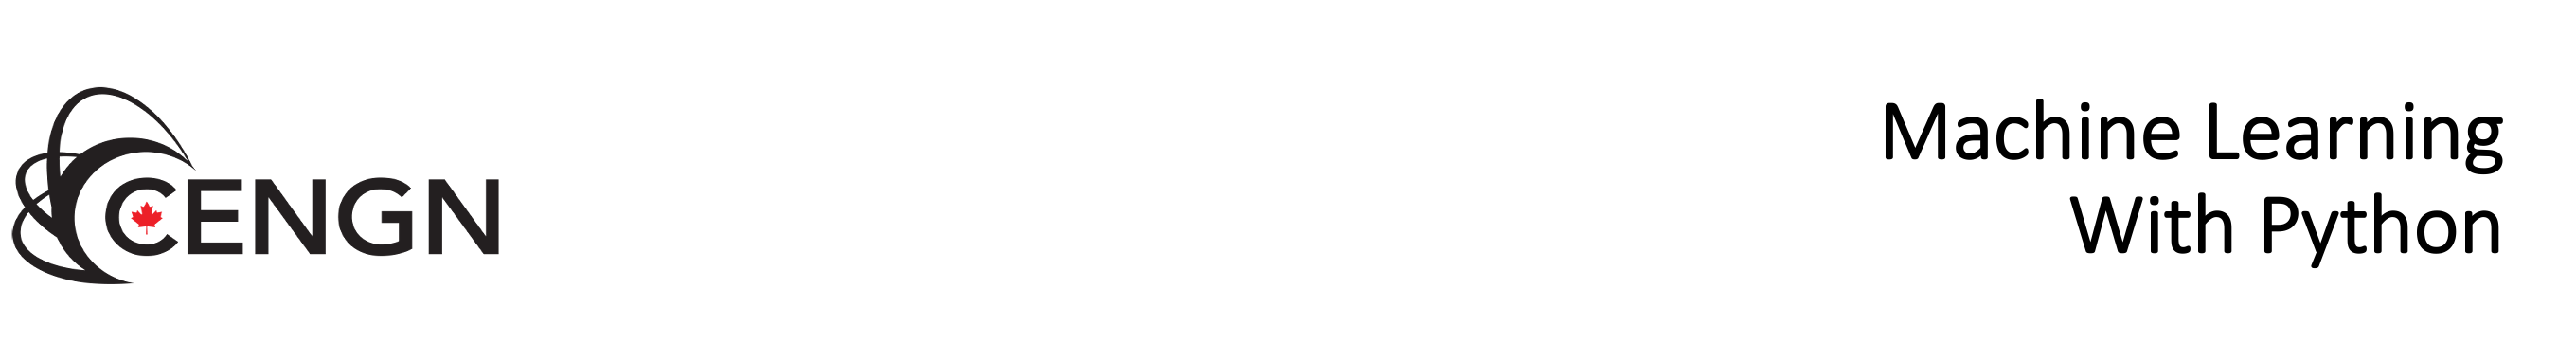
____

# **Section 4.3. Hands-On Clustering**

In this section, we will learn to implement the K-Means clustering method using the popular Sklearn library. 

## **Lab 1 - K-Means Clustering**


The first step, as always, is to import all relevant libraries and algorithms.

**Step 1: Importing Libraries**

In [1]:
# Import all relevant libraries 

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Step 2: Importing the Dataset**

The dataset is provided in `iris.csv`. Import the dataset. 

In [2]:
# Import the dataset

df = pd.read_csv('iris.csv')  

**Step 3: Inspecting the Data**

In [3]:
# Display the number of rows and columns

df.shape

(150, 5)

Read ten random entries from the dataset to confirm the data has been read in correctly and to get an idea of how the dataset looks like.

In [4]:
# Display ten random entries of the dataset

df.sample(n=10)                   

,sepal.length,sepal.width,petal.length,petal.width,variety
53,5.5,2.3,4.0,1.3,Versicolor
138,6.0,3.0,4.8,1.8,Virginica
111,6.4,2.7,5.3,1.9,Virginica
69,5.6,2.5,3.9,1.1,Versicolor
12,4.8,3.0,1.4,0.1,Setosa
33,5.5,4.2,1.4,0.2,Setosa
71,6.1,2.8,4.0,1.3,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor
44,5.1,3.8,1.9,0.4,Setosa
27,5.2,3.5,1.5,0.2,Setosa


**Note:** Since clustering is an unsupervised learning task, we will not use the variety label to train the model. We will use it at the end to compare our model's predictions to the actual variety label to evaluate how well our model performs.

In some cases, a data scientist might want to rename the columns in the dataset. That can be done using pandas' `rename()` function.

In [5]:
# Rename the column by replacing the dot by an underscore

df= df.rename({c:c.replace('.', '_') for c in df.columns}, axis=1) # Using a lambda function

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The output of the `describe()` function shows no outliers, no negative values. Data looks good.

In [7]:
# Display the number of occurrences of each target value

df['variety'].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

The number of occurrences of target values is the same, this indicates a balanced dataset. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


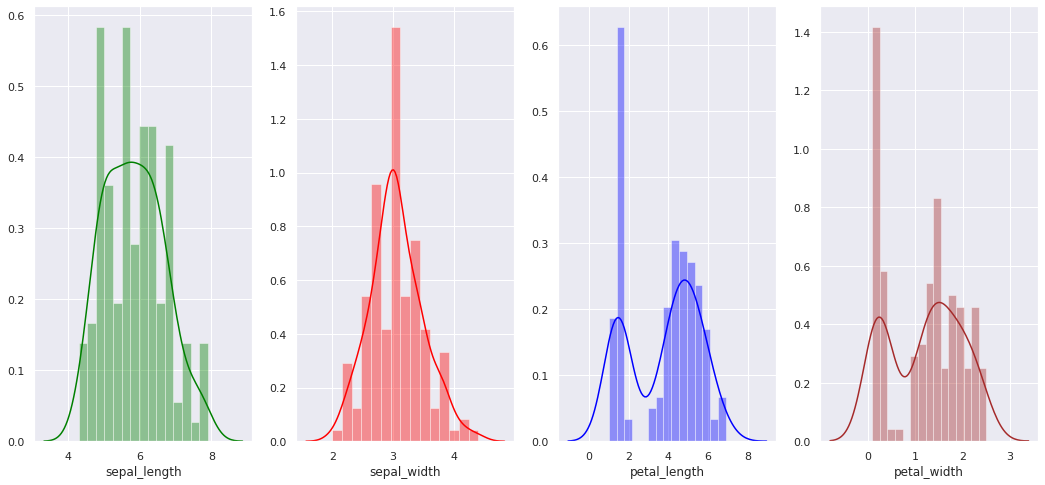

In [9]:
# Plot the distribution of features

sns.set(rc={'figure.figsize':(18,8)})
fig, axs = plt.subplots(ncols=4)  # plot four plots in one figure
sns.set_style(style='whitegrid')

sns.distplot(df['sepal_length'], color = 'green', bins = 15,ax=axs[0])
sns.distplot(df['sepal_width'], color = 'red', bins = 15,ax=axs[1])
sns.distplot(df['petal_length'], color = 'blue', bins = 15,ax=axs[2])
sns.distplot(df['petal_width'], color = 'brown', bins = 15,ax=axs[3])

From the histograms above, we can identify three clusters in the dataset. The long, medium, and short bins each belong to a cluster.

Let's also look at scatter plots.

Text(0.5, 1.0, 'Petal Width Scatter Plot')

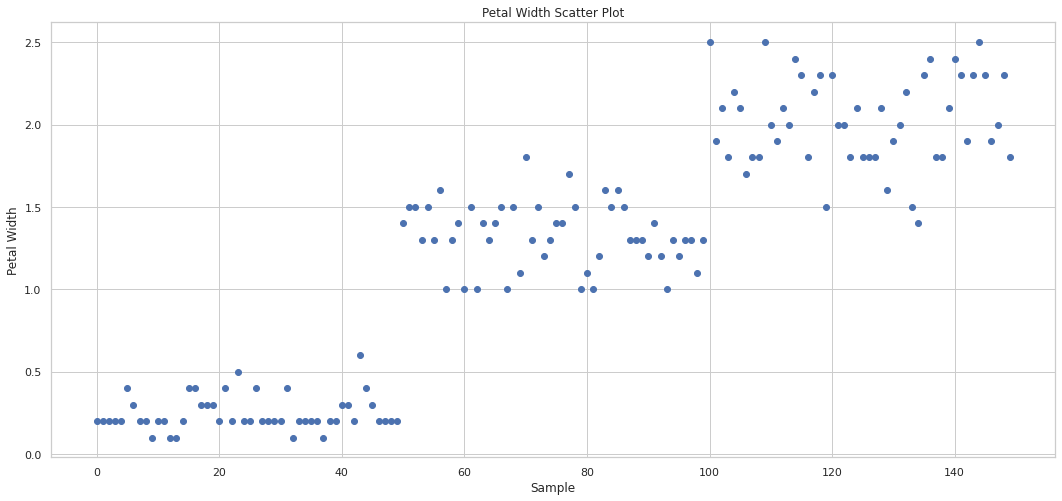

In [10]:
# Plot the distribution of petal width

plt.scatter(df.index, df.petal_width)
plt.xlabel('Sample')
plt.ylabel('Petal Width')
plt.title('Petal Width Scatter Plot')

Text(0.5, 1.0, 'Petal Length Scatter Plot')

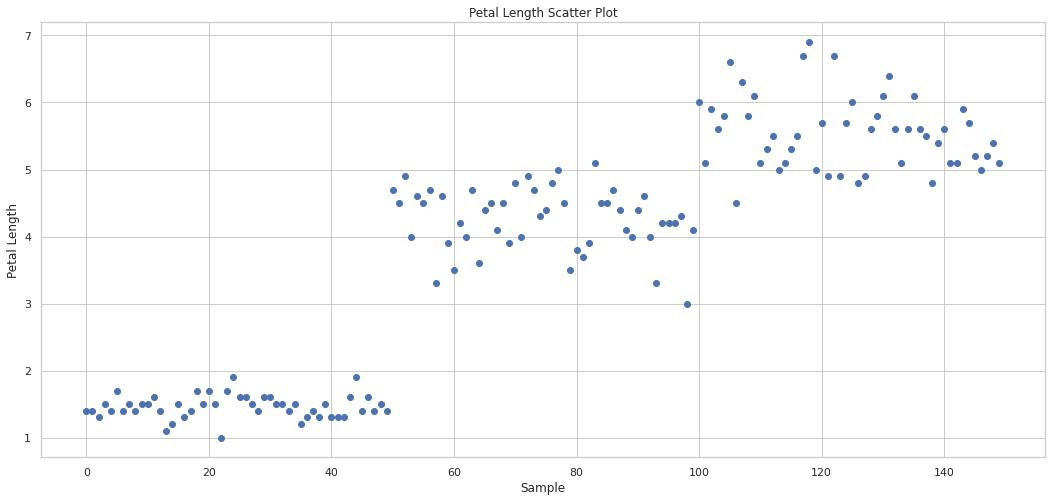

In [11]:
# Plot the distribution of petal length

plt.scatter(df.index, df.petal_length)
plt.xlabel('Sample')
plt.ylabel('Petal Length')
plt.title('Petal Length Scatter Plot')

Text(0.5, 1.0, 'Sepal Width Scatter Plot')

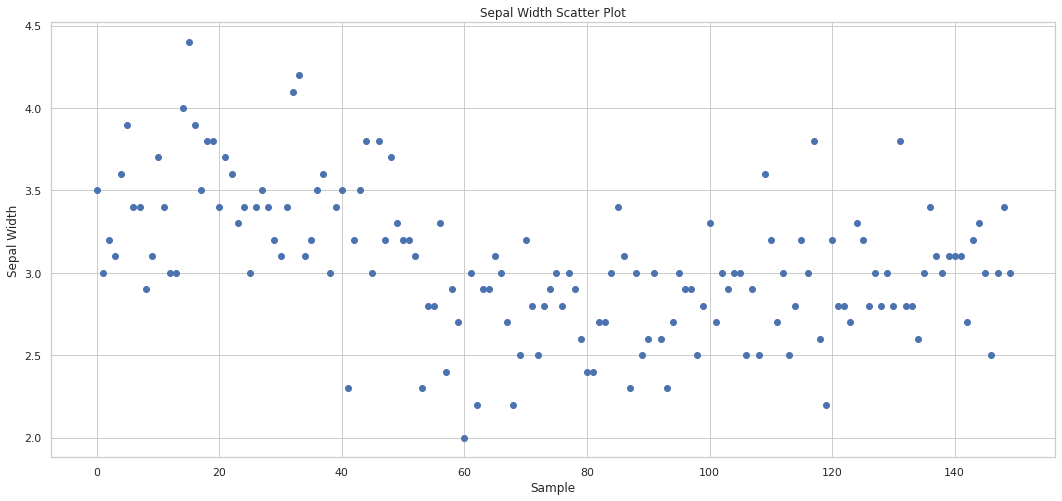

In [12]:
# Plot the distribution of sepal width

plt.scatter(df.index, df.sepal_width)
plt.xlabel('Sample')
plt.ylabel('Sepal Width')
plt.title('Sepal Width Scatter Plot')

Text(0.5, 1.0, 'Sepal Length Scatter Plot')

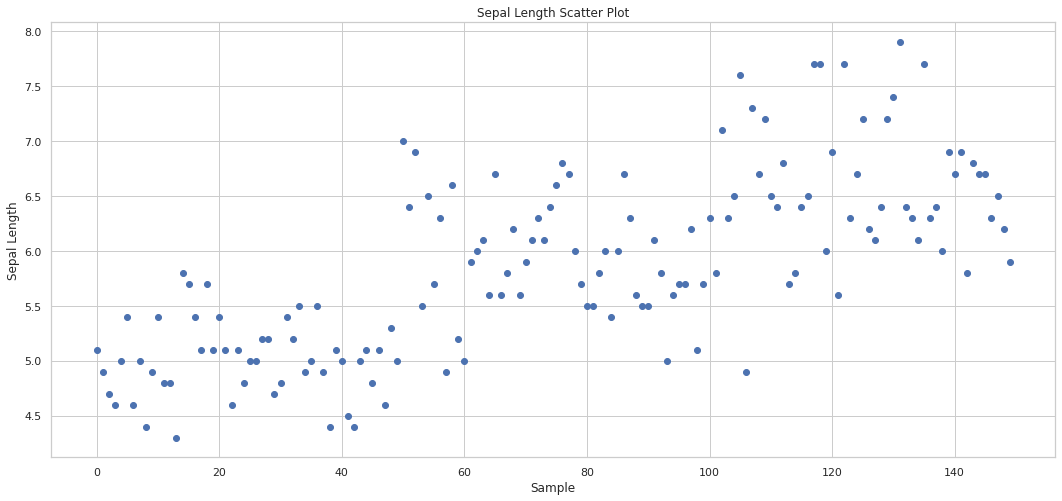

In [13]:
# Plot the distribution of sepal length

plt.scatter(df.index, df.sepal_length)
plt.xlabel('Sample')
plt.ylabel('Sepal Length')
plt.title('Sepal Length Scatter Plot')

As expected the scatter plots also reveal three clusters in the Iris dataset. So, let us go ahead and build our model with three clusters.

There are four features: sepal length, sepal width, petal length, and petal width.

The variety column actually resembles the clusters that we want to predict, so it should be removed from future analysis. We are going to cluster the observations based on the four features. 

**Step 4: Defining the Variables**

Use the `iloc` function on the data to select features by their position.

In [14]:
# Extract the four features indexed by the columns (0,1,2,3)

X = df.iloc[:, [0,1,2,3]].values  
X
# We can also use pandas drop() function, X= df.drop(columns=['variety'])

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Note that we did not set y variable as variety. 
This is because we are performing a clustering task which is an unsupervised learning task that require no labelled data (that is, no target). We are using a labelled data just to be able to visually evaluate out the model performance. 

Let us now implement the K-Means algorithm with the number of clusters set at 3. 

**Step 5: Running the Model** 

In [15]:
kmeans3 = KMeans(n_clusters=3)      # K-Means with 3 clusters
y_pred = kmeans3.fit_predict(X)  # Calling K-Means with 3 clusters on the data

print(y_pred) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


Let us now compare how well the K-Means clustering algorithm performed at identifying the three clusters, that is, the three different species in the data as compared to the true data. Note that in practical applications, we will not always have the luxury of being able to perform this analysis as easily.

However, in practical applications, we may still be able to perform such "external validation" as discussed in Section 4.1 by manually checking observations and studying whether the clusters identified by the algorithm correspond to meaningful groupings.

In our example, let us add another column `labels` to the original dataframe df denoting the cluster to which each observation has been assigned to by the K-Means algorithm.

**Step: 6 Evaluating the Model's Performance**

In [16]:
# Add the predictions to the dataframe for comparison

df['predicted_label'] = y_pred
df.sample(n=10)

,sepal_length,sepal_width,petal_length,petal_width,variety,predicted_label
141,6.9,3.1,5.1,2.3,Virginica,1
114,5.8,2.8,5.1,2.4,Virginica,2
43,5.0,3.5,1.6,0.6,Setosa,0
55,5.7,2.8,4.5,1.3,Versicolor,2
101,5.8,2.7,5.1,1.9,Virginica,2
76,6.8,2.8,4.8,1.4,Versicolor,2
138,6.0,3.0,4.8,1.8,Virginica,2
131,7.9,3.8,6.4,2.0,Virginica,1
2,4.7,3.2,1.3,0.2,Setosa,0
60,5.0,2.0,3.5,1.0,Versicolor,2


Let us now display all the rows and columns in the dataframe and visually inspect how well our clustering algorithm has performed. Look at the variety and labels columns. 

In [17]:
# Allow for changing display of number of columns and rows displayed in Jupyter
# notebooks. If the number of rows is set too low, it will lead to a truncated 
# display of the data.  

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
print(df)

     sepal_length  sepal_width  petal_length  petal_width     variety  \
0             5.1          3.5           1.4          0.2      Setosa   
1             4.9          3.0           1.4          0.2      Setosa   
2             4.7          3.2           1.3          0.2      Setosa   
3             4.6          3.1           1.5          0.2      Setosa   
4             5.0          3.6           1.4          0.2      Setosa   
5             5.4          3.9           1.7          0.4      Setosa   
6             4.6          3.4           1.4          0.3      Setosa   
7             5.0          3.4           1.5          0.2      Setosa   
8             4.4          2.9           1.4          0.2      Setosa   
9             4.9          3.1           1.5          0.1      Setosa   
10            5.4          3.7           1.5          0.2      Setosa   
11            4.8          3.4           1.6          0.2      Setosa   
12            4.8          3.0           1.4       

Let's now compute the mean of the features per cluster

In [18]:
# Compute the mean of features per cluster (flower species)

group_class = df.groupby('predicted_label')  # groups dataframe by the predicted clusters

In [19]:
group_class.mean() # Compute mean for dataframe columns

,sepal_length,sepal_width,petal_length,petal_width
predicted_label,,,,
0,5.006000,3.428000,1.462000,0.246000
1,6.850000,3.073684,5.742105,2.071053
2,5.901613,2.748387,4.393548,1.433871


Looking at the output above, we notice that the petal_length and petal_width has the most varaitions among the three flower species while sepal_length and sepal_width have closer mean values. This was also revealed in the scatter plots - petal_length and petal_width scatter plots clearly identified three clusters in the data.

Let's plot the predicted clusters using petal_length and petal_width features.

Text(0.5, 1.0, 'Predicted Clusters')

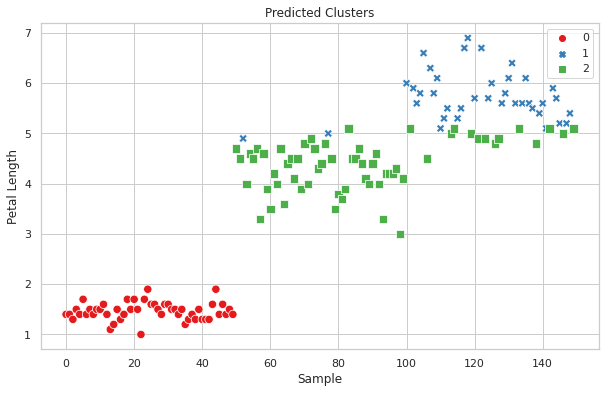

In [20]:
# Plot the predicted clusters based on petal length

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df.index, y=df.petal_length, hue= y_pred, palette = 'Set1', style=y_pred, s=70)

plt.xlabel('Sample')
plt.ylabel('Petal Length')
plt.title('Predicted Clusters')

Text(0.5, 1.0, 'Predicted Clusters')

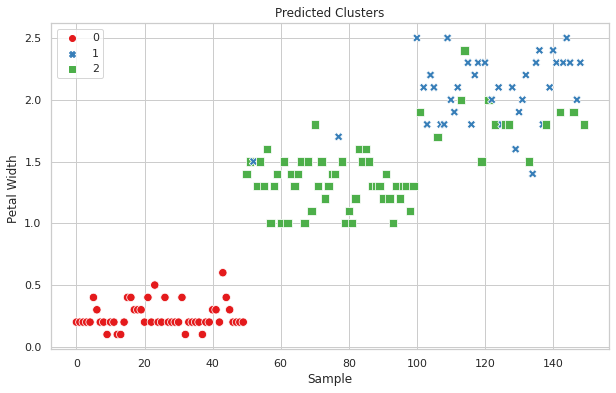

In [21]:
# Plot the predicted clusters based on petal width

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df.index, y=df.petal_width, hue= y_pred, palette = 'Set1', style=y_pred, s=70)

plt.xlabel('Sample')
plt.ylabel('Petal Width ')
plt.title('Predicted Clusters')

In [22]:
kmeans3.cluster_centers_ # cluster_centers_ contains the value of centroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

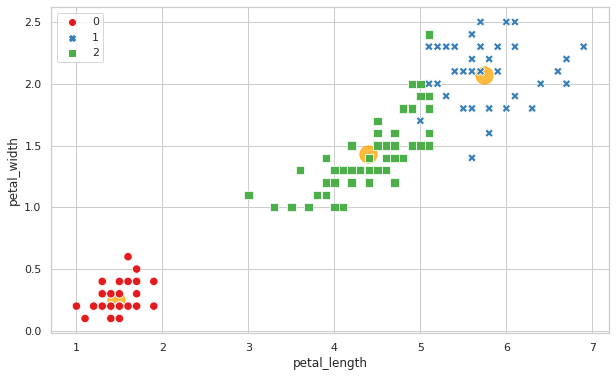

In [23]:
# Plot the predicted clusters with the centroids

plt.figure(figsize=(10,6))

# Plot the centroids
plt.scatter(x = kmeans3.cluster_centers_[: , 2] , # cluster_centers_ contains the value of centroids
            y = kmeans3.cluster_centers_[: , 3] ,
            s = 300 ,      # Define marker size
            c = 'orange' , 
            alpha = 0.75)

# Plot the clusters
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue= y_pred, palette = 'Set1', style=y_pred, s=70)


## **Exercise**

Run the K-Means algorithm with two clusters and observe the output.

In [24]:
### Your code here ###
kmeans2 = KMeans(n_clusters=2)      # K-Means with 3 clusters
y_pred2 = kmeans2.fit_predict(X)  # Calling K-Means with 3 clusters on the data

print(y_pred2) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [25]:
# Add the predictions to the dataframe for comparison

df['predicted_label2'] = y_pred2
df = df.drop(['predicted_label'],axis=1)
df.sample(n=10)

,sepal_length,sepal_width,petal_length,petal_width,variety,predicted_label2
138,6.0,3.0,4.8,1.8,Virginica,0
16,5.4,3.9,1.3,0.4,Setosa,1
143,6.8,3.2,5.9,2.3,Virginica,0
59,5.2,2.7,3.9,1.4,Versicolor,0
97,6.2,2.9,4.3,1.3,Versicolor,0
57,4.9,2.4,3.3,1.0,Versicolor,1
130,7.4,2.8,6.1,1.9,Virginica,0
126,6.2,2.8,4.8,1.8,Virginica,0
120,6.9,3.2,5.7,2.3,Virginica,0
4,5.0,3.6,1.4,0.2,Setosa,1


In [26]:
# Allow for changing display of number of columns and rows displayed in Jupyter
# notebooks. If the number of rows is set too low, it will lead to a truncated 
# display of the data.  

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
print(df)

     sepal_length  sepal_width  petal_length  petal_width     variety  \
0             5.1          3.5           1.4          0.2      Setosa   
1             4.9          3.0           1.4          0.2      Setosa   
2             4.7          3.2           1.3          0.2      Setosa   
3             4.6          3.1           1.5          0.2      Setosa   
4             5.0          3.6           1.4          0.2      Setosa   
5             5.4          3.9           1.7          0.4      Setosa   
6             4.6          3.4           1.4          0.3      Setosa   
7             5.0          3.4           1.5          0.2      Setosa   
8             4.4          2.9           1.4          0.2      Setosa   
9             4.9          3.1           1.5          0.1      Setosa   
10            5.4          3.7           1.5          0.2      Setosa   
11            4.8          3.4           1.6          0.2      Setosa   
12            4.8          3.0           1.4       

In [27]:
# Compute the mean of features per cluster (flower species)

group_class2 = df.groupby('predicted_label2')  # groups dataframe by the predicted clusters

In [28]:
group_class2.mean() # Compute mean for dataframe columns

,sepal_length,sepal_width,petal_length,petal_width
predicted_label2,,,,
0,6.301031,2.886598,4.958763,1.695876
1,5.005660,3.369811,1.560377,0.290566


Text(0.5, 1.0, 'Predited Clusters')

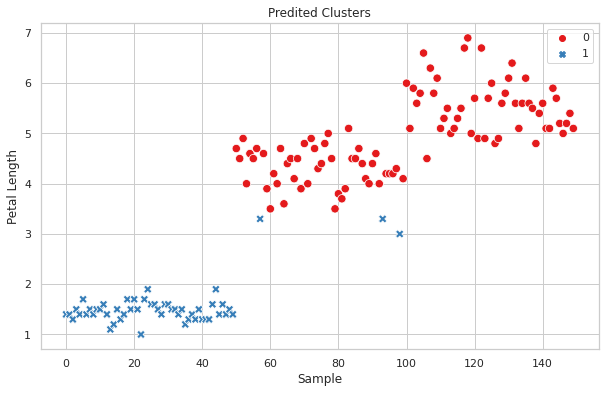

In [29]:
# Plot the predicted clusters based on petal length

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df.index, y=df.petal_length, hue= y_pred2, palette = 'Set1', style=y_pred2, s=70)

plt.xlabel('Sample')
plt.ylabel('Petal Length')
plt.title('Predited Clusters')

Text(0.5, 1.0, 'Predited Clusters')

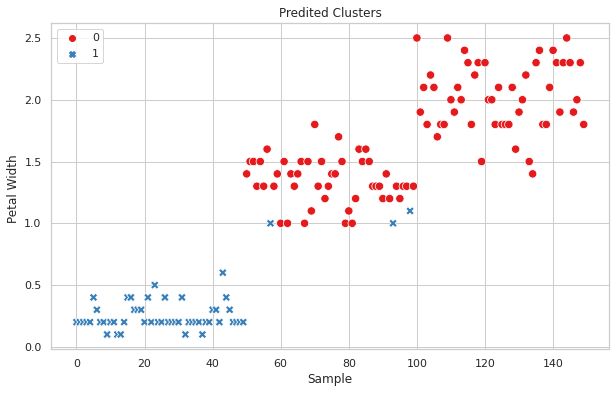

In [30]:
# Plot the predicted clusters based on petal width

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df.index, y=df.petal_width, hue= y_pred2, palette = 'Set1', style=y_pred2, s=70)

plt.xlabel('Sample')
plt.ylabel('Petal Width ')
plt.title('Predited Clusters')

In [31]:
kmeans2.cluster_centers_ # cluster_centers_ contains the value of centroids

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

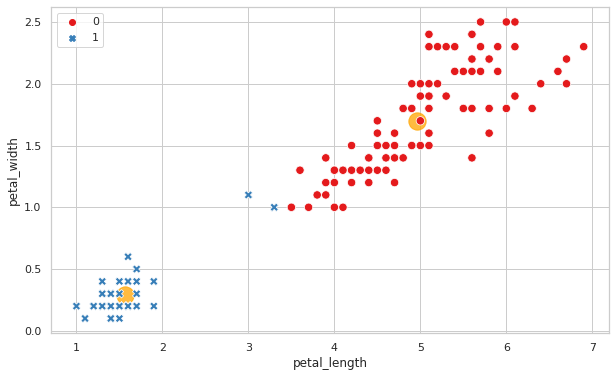

In [32]:
# Plot the predicted clusters with the centroids

plt.figure(figsize=(10,6))

# Plot the centroids
plt.scatter(x = kmeans2.cluster_centers_[: , 2] , # cluster_centers_ contains the value of centroids
            y = kmeans2.cluster_centers_[: , 3] ,
            s = 300 ,      # Define marker size
            c = 'orange' , 
            alpha = 0.75)

# Plot the clusters
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue= y_pred2, palette = 'Set1', style=y_pred2, s=70)

Remember to shutdown this notebook once done from this lab.

## **Switch to LMS**

Switch to LMS to review the lab results and then start with Lab 2 – another lab on K-Means Clustering.